# Congressional Voting Dataset: Data Exploration and Preprocessing

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import random

## Data Loading

In [167]:
pathlrn = '../../data/Congressional_voting/CongressionalVotingID.shuf.lrn.csv'
pathtes = '../../data/Congressional_voting/CongressionalVotingID.shuf.tes.csv'


training = pd.read_csv(pathlrn)
test = pd.read_csv(pathtes)

In [168]:
training.head()

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,67,republican,n,y,n,y,y,y,y,n,n,n,y,y,y,y,n,y
1,338,democrat,y,n,y,n,n,n,y,y,y,n,n,n,n,n,y,y
2,35,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
3,122,republican,n,unknown,n,y,y,y,n,n,n,y,n,y,y,y,n,y
4,420,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,n,y


In [169]:
training.shape

(218, 18)

In [170]:
test.head()

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,430,y,n,y,n,unknown,n,y,y,y,y,n,y,n,unknown,y,y
1,411,n,n,n,y,y,y,n,n,n,n,y,y,y,y,n,y
2,167,y,n,y,y,y,y,y,y,n,y,n,y,n,y,y,y
3,99,y,y,y,n,n,y,y,y,y,y,n,n,n,n,n,y
4,415,y,y,y,n,n,n,y,y,y,n,n,n,n,n,n,y


In [171]:
test.shape

(217, 17)

## Data Transformation

In [172]:
training_df = training.replace(regex={'^y$': '1', '^n$': '0', 'unknown': np.NaN})
training_df

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,67,republican,0,1,0,1,1,1,1,0,0,0,1,1,1,1,0,1
1,338,democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1
2,35,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
3,122,republican,0,NaN,0,1,1,1,0,0,0,1,0,1,1,1,0,1
4,420,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,91,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
214,15,republican,0,1,0,1,1,1,0,0,0,0,0,1,NaN,NaN,0,NaN
215,412,democrat,1,0,1,0,0,1,1,1,1,1,1,0,0,0,0,1
216,313,democrat,1,1,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [173]:
test_df = test.replace(regex={'^y$': '1', '^n$': '0', 'unknown': np.NaN})
test_df

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,430,1,0,1,0,NaN,0,1,1,1,1,0,1,0,NaN,1,1
1,411,0,0,0,1,1,1,0,0,0,0,1,1,1,1,0,1
2,167,1,0,1,1,1,1,1,1,0,1,0,1,0,1,1,1
3,99,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,1
4,415,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,304,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0
213,386,1,1,0,0,1,1,0,0,0,0,1,1,1,1,1,0
214,189,1,NaN,0,1,1,1,1,1,0,0,0,1,NaN,1,NaN,NaN
215,53,1,1,1,0,0,0,1,1,1,0,0,0,0,0,NaN,NaN


## Distribution

the distribution of the classes in the training set

In [174]:
training_df['class'].value_counts()

democrat      125
republican     93
Name: class, dtype: int64

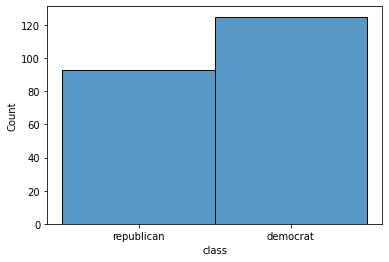

In [175]:
tmp = sns.histplot(data=training_df, x="class")
tmp.figure.savefig('../../plots/Congressional_voting/Data_histogram.png')

describe the whole dataset

In [176]:
#delete the columns ID and class in order to describe the data
full_df = pd.concat([training_df, test_df])
dropped_full_df = full_df.drop(labels=None, axis=0, index=None, columns=['ID', 'class'] , level=None, inplace=False, errors='raise')
dropped_full_df.describe()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1
freq,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


describe the training set

In [177]:
dropped_training_df = training_df.drop(labels=None, axis=0, index=None, columns=['ID'], level=None, inplace=False, errors='raise')
dropped_training_df.describe()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,218,212,198,214,213,212,211,209,211,204,215,206,202,205,210,203,164
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,0,1,1,0,1,1,1,1,0,1,0,0,1,1,0,1
freq,125,122,100,124,115,114,142,120,117,111,115,134,115,110,127,114,131


check for correlations of class "democrat" and its features

In [178]:
dropped_training_democrat = dropped_training_df.loc[dropped_training_df['class'] == "democrat"]
dropped_training_democrat.describe()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,125,121,116,123,121,121,119,121,124,113,124,119,117,118,122,119,83
unique,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
freq,125,77,62,110,114,96,62,93,104,82,62,62,104,82,82,78,77


check for correlations of class "democrat" and its features

In [179]:
dropped_training_republican = dropped_training_df.loc[dropped_training_df['class'] == "republican"]
dropped_training_republican.describe()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,93,91,82,91,92,91,92,88,87,91,91,87,85,87,88,84,81
unique,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,republican,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1
freq,93,78,44,77,91,89,85,61,74,80,53,77,74,74,87,73,54


describe the test set

In [180]:
dropped_test_df = test_df.drop(labels=None, axis=0, index=None, columns=['ID'] , level=None, inplace=False, errors='raise')
dropped_test_df.describe()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,211,189,210,211,208,213,212,209,209,213,208,202,205,208,204,167
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,1
freq,114,95,129,132,110,130,119,125,114,112,130,118,106,121,119,138


## Missing Values

In [181]:
print("\nTotal number of missing values across the training set: ", dropped_training_df.isna().sum().sum())


Total number of missing values across the training set:  199


In [182]:
print("\nTotal number of missing values across the test set: ", dropped_test_df.isna().sum(axis=0).sum())


Total number of missing values across the test set:  193


#### The columns and their numbers of missing values

In [183]:
dropped_test_df.isnull().sum(axis=0).sort_values(ascending = False)

export-administration-act-south-africa    50
water-project-cost-sharing                28
education-spending                        15
duty-free-exports                         13
superfund-right-to-sue                    12
el-salvador-aid                            9
synfuels-crporation-cutback                9
crime                                      9
aid-to-nicaraguan-contras                  8
mx-missile                                 8
adoption-of-the-budget-resolution          7
handicapped-infants                        6
physician-fee-freeze                       6
anti-satellite-test-ban                    5
religious-groups-in-schools                4
immigration                                4
dtype: int64

In [184]:
dropped_training_df.isnull().sum(axis=0).sort_values(ascending = False)

export-administration-act-south-africa    54
water-project-cost-sharing                20
education-spending                        16
duty-free-exports                         15
mx-missile                                14
superfund-right-to-sue                    13
synfuels-crporation-cutback               12
anti-satellite-test-ban                    9
crime                                      8
aid-to-nicaraguan-contras                  7
religious-groups-in-schools                7
handicapped-infants                        6
el-salvador-aid                            6
physician-fee-freeze                       5
adoption-of-the-budget-resolution          4
immigration                                3
class                                      0
dtype: int64

#### Investigating the distribution of the classes over the missing values of one attribute

In [185]:
training_df[training_df['export-administration-act-south-africa'].isna()].sort_values(by=['class'])

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
122,61,democrat,1,1,1,0,0,NaN,1,1,1,1,0,0,0,0,1,NaN
102,239,democrat,1,1,1,0,0,0,1,1,NaN,1,0,0,0,0,1,NaN
103,426,democrat,0,0,1,0,0,0,1,1,0,1,1,0,0,0,1,NaN
120,197,democrat,0,0,1,0,0,1,1,1,1,0,1,1,0,1,1,NaN
211,320,democrat,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,NaN
123,382,democrat,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,NaN
197,113,democrat,0,NaN,1,0,0,1,1,1,0,1,0,0,0,0,1,NaN
195,219,democrat,1,NaN,1,0,0,0,1,1,1,0,NaN,0,0,0,1,NaN
134,273,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,NaN
193,130,democrat,NaN,NaN,1,0,0,0,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
training_df[training_df['water-project-cost-sharing'].isna()].sort_values(by=['class'])

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
197,113,democrat,0,NaN,1,0,0,1,1,1,0,1,0,0,0,0,1,NaN
10,129,democrat,0,NaN,1,0,0,1,0,1,0,1,1,0,0,0,1,1
193,130,democrat,NaN,NaN,1,0,0,0,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
67,332,democrat,1,NaN,1,0,0,0,1,1,1,0,0,0,0,0,1,NaN
69,18,democrat,1,NaN,1,0,0,0,1,1,1,0,0,0,1,0,1,1
87,115,democrat,1,NaN,1,0,0,0,1,1,1,0,0,0,0,0,1,NaN
91,105,democrat,NaN,NaN,NaN,NaN,0,1,1,1,1,1,NaN,0,1,1,0,NaN
195,219,democrat,1,NaN,1,0,0,0,1,1,1,0,NaN,0,0,0,1,NaN
137,125,democrat,0,NaN,1,0,0,0,1,1,1,0,0,0,0,0,1,1
192,249,republican,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
training_df[training_df['education-spending'].isna()].sort_values(by=['class'])

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
6,292,democrat,1,0,1,0,0,1,1,1,1,1,0,NaN,0,1,0,1
44,355,democrat,0,1,1,0,0,1,1,1,1,1,0,NaN,0,0,1,1
83,396,democrat,1,1,1,NaN,0,0,0,1,0,0,1,NaN,0,0,1,1
86,179,democrat,NaN,0,1,0,0,0,1,1,1,1,1,NaN,0,0,1,NaN
140,262,democrat,1,0,1,0,0,NaN,1,1,1,0,NaN,NaN,0,NaN,NaN,NaN
182,371,democrat,1,1,1,0,NaN,1,1,1,0,1,NaN,NaN,0,0,1,1
189,65,democrat,1,1,1,0,0,0,1,1,1,0,1,NaN,0,0,0,1
193,130,democrat,NaN,NaN,1,0,0,0,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
29,12,republican,0,1,0,1,1,1,0,0,0,0,1,NaN,1,1,NaN,NaN
47,378,republican,0,1,0,1,1,1,NaN,NaN,0,0,NaN,NaN,1,NaN,NaN,NaN


#### The rows and their missing values

In [188]:
dropped_training_df.isnull().sum(axis=1).sort_values(ascending = False).tolist()

[16,
 9,
 7,
 6,
 6,
 6,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Dropping all data points (rows) that have missing values for more than half of the features (ID and class do not count as features)

In [189]:
#at least 9 columns (including class) have to have values
#the other 8 columns (features) are allowed to have missing values
final_df = dropped_training_df.dropna(thresh=9)
final_df.isnull().sum(axis=1).sort_values(ascending = False).tolist()

[7,
 6,
 6,
 6,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## Outliers

Parallel Coordinates to detect outliers

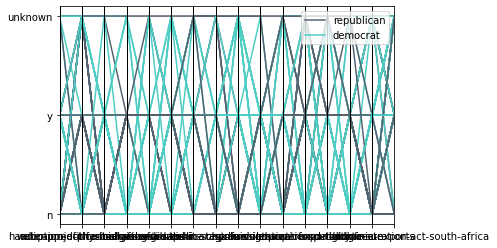

In [190]:
drop_training = training.drop(labels=None, axis=0, index=None, columns=['ID'] , level=None, inplace=False, errors='raise')
fig = pd.plotting.parallel_coordinates(drop_training, 'class', color=('#556270', '#4ECDC4'))
fig.figure.savefig('../../plots/Congressional_voting/Parallel_coordinates.png')

## Fill missing values

save as a csv in order to replace the missing values with random values later

In [191]:
cvp_lrn = '../../outputs/Congressional_voting/congressional_voting_preprocessed_mis_val_lrn.csv'
final_df.to_csv(path_or_buf=cvp_lrn, sep=',', na_rep='', float_format=None, columns=None, header=True, index=False, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)
cvp_tes = '../../outputs/Congressional_voting/congressional_voting_preprocessed_mis_val_tes.csv'
dropped_test_df.to_csv(path_or_buf=cvp_tes, sep=',', na_rep='', float_format=None, columns=None, header=True, index=False, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)

load the saved csv

In [192]:
final_neg = pd.read_csv('../../outputs/Congressional_voting/congressional_voting_preprocessed_mis_val_lrn.csv')
final_rand = pd.read_csv('../../outputs/Congressional_voting/congressional_voting_preprocessed_mis_val_lrn.csv')
finaltest_neg = pd.read_csv('../../outputs/Congressional_voting/congressional_voting_preprocessed_mis_val_tes.csv')
finaltest_rand = pd.read_csv('../../outputs/Congressional_voting/congressional_voting_preprocessed_mis_val_tes.csv')

fill values with -1 (random numbers 0 or 1 was proven to be less successful)

In [193]:
#final_rand.fillna(random.choice([0,1]), inplace =True) #filling with random numbers 0 or 1
final_neg = final_neg.fillna(value= -1) #filling with -1

In [194]:
#finaltest_rand.fillna(random.choice([0,1]), inplace =True) #filling with random numbers 0 or 1
finaltest_neg = finaltest_neg.fillna(value= -1) #filling with -1

## Save dataframe to csv

In [195]:
#cvp_rnd_lrn = os.path.join(parentDirectory, 'congressional_voting_preprocessed_rand_lrn.csv')
#final_rand.to_csv(path_or_buf=cvp_rnd_lrn, sep=',', na_rep='', float_format=None, columns=None, header=True, index=False, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)

cvp_neg_lrn = '../../outputs/Congressional_voting/congressional_voting_preprocessed_neg_lrn.csv'
final_neg.to_csv(path_or_buf=cvp_neg_lrn, sep=',', na_rep='', float_format=None, columns=None, header=True, index=False, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)

#cvp_rand_tes = os.path.join(parentDirectory, 'congressional_voting_preprocessed_rand_tes.csv')
#finaltest_rand.to_csv(path_or_buf=cvp_rand_tes, sep=',', na_rep='', float_format=None, columns=None, header=True, index=False, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)

cvp_neg_tes = '../../outputs/Congressional_voting/congressional_voting_preprocessed_neg_tes.csv'
finaltest_neg.to_csv(path_or_buf=cvp_neg_tes, sep=',', na_rep='', float_format=None, columns=None, header=True, index=False, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)

removing no longer needed temporary files

In [196]:
rm congressional_voting_preprocessed_mis_val_lrn.csv

rm: congressional_voting_preprocessed_mis_val_lrn.csv: No such file or directory


In [197]:
rm congressional_voting_preprocessed_mis_val_tes.csv

rm: congressional_voting_preprocessed_mis_val_tes.csv: No such file or directory


# Congressional Voting Dataset: Classification Training

Importing required packages

In [198]:
from sklearn import ensemble
from sklearn import svm
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
import time
%matplotlib inline

load data

In [199]:
#parentDirectory = os.path.dirname(__file__)
'''Datafolder musst be in Folder the same folder as this file.
'''

#loading one of these datasets (missing values filled with -1 or with random 0 or 1), while the other one is uncommented
kind = 'neg'
#kind = 'rand'
voting = pd.read_csv(f'../../outputs/Congressional_voting/congressional_voting_preprocessed_{kind}_lrn.csv')

no missing values

In [200]:
voting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   class                                   216 non-null    object 
 1   handicapped-infants                     216 non-null    float64
 2   water-project-cost-sharing              216 non-null    float64
 3   adoption-of-the-budget-resolution       216 non-null    float64
 4   physician-fee-freeze                    216 non-null    float64
 5   el-salvador-aid                         216 non-null    float64
 6   religious-groups-in-schools             216 non-null    float64
 7   anti-satellite-test-ban                 216 non-null    float64
 8   aid-to-nicaraguan-contras               216 non-null    float64
 9   mx-missile                              216 non-null    float64
 10  immigration                             216 non-null    float6

In [201]:
voting.isnull().sum()

class                                     0
handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-crporation-cutback               0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64

fit transform classes

In [202]:
voting['class'].unique()

array(['republican', 'democrat'], dtype=object)

In [203]:
label_class = LabelEncoder()

In [204]:
voting['class'] = label_class.fit_transform(voting['class'])

In [205]:
voting.head()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
1,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1,0.0,-1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
4,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


separate the dataset as response variable and feature variables

In [206]:
X = voting.drop('class', axis=1)
y = voting['class']

train and test split the data

In [207]:
#play with test_size split number (between 0 and 1)
#random_state should always stay 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

apply standard scaling to get optimized results

In [208]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

show first 10 rows

In [209]:
X_train[:10]

array([[ 1.1830475 ,  0.9721249 ,  0.8607248 , -0.83280483, -0.93677693,
        -1.13539572,  0.86382457,  0.87396957,  1.04427062, -1.01367985,
         1.31974366, -0.57607153, -0.77306222, -0.98094653,  1.0395105 ,
        -1.59679315],
       [ 1.1830475 ,  0.9721249 , -1.0619332 ,  1.05196399,  0.93677693,
         0.70694451, -0.90495908, -0.89453356, -0.61882703, -1.01367985,
         1.31974366, -0.57607153,  0.91006059,  0.79508298, -0.600818  ,
        -1.59679315],
       [-0.73661448, -2.15321123,  0.8607248 , -0.83280483, -0.93677693,
        -1.13539572,  0.86382457,  0.87396957,  1.04427062, -1.01367985,
        -0.49622362, -0.57607153, -0.77306222, -0.98094653,  1.0395105 ,
         0.74064023],
       [ 1.1830475 , -0.59054317,  0.8607248 , -0.83280483, -0.93677693,
        -1.13539572,  0.86382457,  0.87396957,  1.04427062,  0.90228646,
        -0.49622362, -0.57607153, -0.77306222, -0.98094653,  1.0395105 ,
         0.74064023],
       [-2.65627647, -0.59054317,  0

# Random Forest Classifier

### Holdout

In [210]:
#no settings
start = time.time()

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

end = time.time()

print("runtime: ", round((end - start),4), " seconds")
print("\n", classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))
print("\naccuracy: ", round(accuracy_score(y_test, pred_rfc),5))
print("Precision:", round(metrics.precision_score(y_test, pred_rfc),5))
print("Recall:", round(metrics.recall_score(y_test, pred_rfc),5))

runtime:  0.1096  seconds

               precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.95      1.00      0.97        18

    accuracy                           0.98        44
   macro avg       0.97      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44

[[25  1]
 [ 0 18]]

accuracy:  0.97727
Precision: 0.94737
Recall: 1.0


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


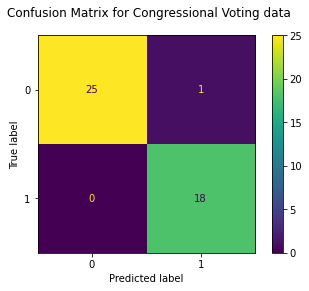

In [211]:
fig=plot_confusion_matrix(rfc, X_test, y_test)
fig.figure_.suptitle("Confusion Matrix for Congressional Voting data")
fig.figure_.savefig('../../plots/Congressional_voting/RF_confusion.png')
plt.show()

#### Parameter Tuning

In [212]:
#Trying different hyper parameter settings
rfc = (RandomForestClassifier(n_estimators=100, max_features=15, max_depth=7),
       RandomForestClassifier(n_estimators=200, max_features=10, max_depth=100),
       RandomForestClassifier(n_estimators=500, max_features=15, max_depth=2))

for rf in rfc:
    start = time.time()
    rf.fit(X_train, y_train)
    pred_rfc = rf.predict(X_test)
    end = time.time()
    print("runtime: ", round((end-start),4), " seconds")
    print("accuracy: ", round(accuracy_score(y_test, pred_rfc),5))
    print("Precision:", round(metrics.precision_score(y_test, pred_rfc),5))
    print("Recall:", round(metrics.recall_score(y_test, pred_rfc),5), "\n")

runtime:  0.0974  seconds
accuracy:  0.97727
Precision: 0.94737
Recall: 1.0 

runtime:  0.1886  seconds
accuracy:  0.97727
Precision: 0.94737
Recall: 1.0 

runtime:  0.488  seconds
accuracy:  0.97727
Precision: 0.94737
Recall: 1.0 



### K-Fold Cross Validation

In [213]:
start = time.time()

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
classifier = ensemble.RandomForestClassifier(n_jobs=-1)
param_grid = {
    'n_estimators': [10, 50],
    'max_depth': range(5, 15),
    'max_features': range(10, 15)
}

model = model_selection.GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring="accuracy",
    verbose=10,
    n_jobs=1,
    cv=5,
    )

model.fit(X, y)

end = time.time()

print("runtime: ", round(end-start,4), "seconds")

print(round(model.best_score_,5))
print("\n", model.best_params_)
print("\n", model.best_estimator_.get_params())

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5; 1/100] START max_depth=5, max_features=10, n_estimators=10.............
[CV 1/5; 1/100] END max_depth=5, max_features=10, n_estimators=10;, score=0.977 total time=   0.0s
[CV 2/5; 1/100] START max_depth=5, max_features=10, n_estimators=10.............
[CV 2/5; 1/100] END max_depth=5, max_features=10, n_estimators=10;, score=0.953 total time=   0.0s
[CV 3/5; 1/100] START max_depth=5, max_features=10, n_estimators=10.............
[CV 3/5; 1/100] END max_depth=5, max_features=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 4/5; 1/100] START max_depth=5, max_features=10, n_estimators=10.............
[CV 4/5; 1/100] END max_depth=5, max_features=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 5/5; 1/100] START max_depth=5, max_features=10, n_estimators=10.............
[CV 5/5; 1/100] END max_depth=5, max_features=10, n_estimators=10;, score=0.930 total time=   0.0s
[CV 1/5; 2/100] START max_depth=5, ma

# SVM Classifier

### Holdout 

In [214]:
#no settings
start = time.time()

svc = svm.SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
                      
end = time.time()
print("runtime: ", round(end - start, 4), "seconds\n")
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
print("\naccuracy: ", round(accuracy_score(y_test, pred_svc),5))
print("Precision:", round(metrics.precision_score(y_test, pred_svc),5))
print("Recall:", round(metrics.recall_score(y_test, pred_svc),5))

runtime:  0.0023 seconds

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        26
           1       0.89      0.94      0.92        18

    accuracy                           0.93        44
   macro avg       0.93      0.93      0.93        44
weighted avg       0.93      0.93      0.93        44

[[24  2]
 [ 1 17]]

accuracy:  0.93182
Precision: 0.89474
Recall: 0.94444


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


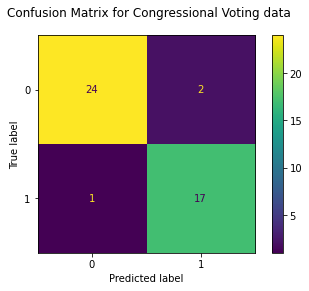

In [215]:
fig=plot_confusion_matrix(svc, X_test, y_test)
fig.figure_.suptitle("Confusion Matrix for Congressional Voting data")
fig.figure_.savefig('../../plots/Congressional_voting/SVM_confusion.png')
plt.show()

#### Parameter Tuning

In [216]:
#Trying different hyper parameter settings
svc = (svm.SVC(),
       svm.SVC(kernel='linear'),
       svm.SVC(kernel='linear', gamma=2, C=1),
       svm.SVC(kernel='linear', gamma=1, C=1),
       svm.SVC(kernel='linear', gamma=0.1, C=2),
       svm.SVC(gamma=2, C=1),
       svm.SVC(gamma=2, C=2),
       svm.SVC(gamma=0.01, C=1),
       svm.SVC(gamma=0.01, C=2))

for sv in svc:
    start=time.time()
    sv.fit(X_train, y_train)
    pred_svc = sv.predict(X_test)
    end = time.time()
    print(sv)
    print("runtime: ", round(end-start,4), "seconds")
    print("accuracy: ", round(accuracy_score(y_test, pred_svc),5))
    print("Precision:", round(metrics.precision_score(y_test, pred_svc),5))
    print("Recall:", round(metrics.recall_score(y_test, pred_svc),5), "\n")

SVC()
runtime:  0.0026 seconds
accuracy:  0.93182
Precision: 0.89474
Recall: 0.94444 

SVC(kernel='linear')
runtime:  0.0012 seconds
accuracy:  0.90909
Precision: 0.85
Recall: 0.94444 

SVC(C=1, gamma=2, kernel='linear')
runtime:  0.001 seconds
accuracy:  0.90909
Precision: 0.85
Recall: 0.94444 

SVC(C=1, gamma=1, kernel='linear')
runtime:  0.001 seconds
accuracy:  0.90909
Precision: 0.85
Recall: 0.94444 

SVC(C=2, gamma=0.1, kernel='linear')
runtime:  0.001 seconds
accuracy:  0.95455
Precision: 0.9
Recall: 1.0 

SVC(C=1, gamma=2)
runtime:  0.0026 seconds
accuracy:  0.70455
Precision: 1.0
Recall: 0.27778 

SVC(C=2, gamma=2)
runtime:  0.0025 seconds
accuracy:  0.70455
Precision: 1.0
Recall: 0.27778 

SVC(C=1, gamma=0.01)
runtime:  0.0011 seconds
accuracy:  0.95455
Precision: 0.9
Recall: 1.0 

SVC(C=2, gamma=0.01)
runtime:  0.0013 seconds
accuracy:  0.97727
Precision: 0.94737
Recall: 1.0 



In [217]:
#get support vectors of last entry in clf
sv.support_vectors_

array([[ 1.1830475 ,  0.9721249 , -1.0619332 ,  1.05196399,  0.93677693,
         0.70694451, -0.90495908, -0.89453356, -0.61882703, -1.01367985,
         1.31974366, -0.57607153,  0.91006059,  0.79508298, -0.600818  ,
        -1.59679315],
       [-0.73661448,  0.9721249 , -1.0619332 ,  1.05196399,  0.93677693,
         0.70694451, -0.90495908, -0.89453356, -0.61882703, -1.01367985,
        -0.49622362, -0.57607153, -2.45618504,  0.79508298,  1.0395105 ,
         0.74064023],
       [-0.73661448,  0.9721249 ,  0.8607248 ,  1.05196399,  0.93677693,
         0.70694451, -0.90495908, -0.89453356, -0.61882703,  0.90228646,
         1.31974366, -0.57607153,  0.91006059,  0.79508298, -0.600818  ,
        -0.42807646],
       [ 1.1830475 ,  0.9721249 ,  0.8607248 , -0.83280483,  0.93677693,
         0.70694451, -0.90495908,  0.87396957, -0.61882703,  0.90228646,
         1.31974366, -0.57607153,  0.91006059,  0.79508298,  1.0395105 ,
         0.74064023],
       [-0.73661448,  0.9721249 , -1

In [218]:
#get indices of support vectors of last entry in clf
print(len(sv.support_), " support vectors")
sv.support_

46  support vectors


array([  1,   8,  18,  23,  25,  30,  33,  39,  43,  50,  54,  64,  78,
        82,  88, 115, 118, 123, 127, 131, 139, 144, 152, 157, 170,  11,
        34,  45,  60,  62,  67,  68,  72,  85,  94, 100, 104, 108, 137,
       148, 153, 154, 158, 160, 162, 163], dtype=int32)

In [219]:
#get number of support vectors for each class of last entry in clf
sv.n_support_

array([25, 21], dtype=int32)

### K-Fold Cross-Validation

In [220]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model = SVC()
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9545454545454546, 0.9767441860465116, 0.9302325581395349, 0.9302325581395349, 0.9767441860465116]
Avg accuracy : 0.9536997885835096


### Gridsearch

In [221]:
start = time.time()

svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
classifier = SVC()
param_grid = {
    'gamma': [0.1, 1, 2, 5],
    'C': [0.1, 1, 2]
}

model = model_selection.GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring="accuracy",
    verbose=10,
    n_jobs=1,
    cv=5, #cross-validation with 5 folds
    )

model.fit(X, y)

end = time.time()

print("runtime: ", round(end-start,4), "seconds")

print(round(model.best_score_,5))
print("\n", model.best_params_)
print("\n", model.best_estimator_.get_params())

print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
print("\naccuracy: ", round(accuracy_score(y_test, pred_svc),5))
print("Precision:", round(metrics.precision_score(y_test, pred_svc),5))
print("Recall:", round(metrics.recall_score(y_test, pred_svc),5))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START C=0.1, gamma=0.1...........................................
[CV 1/5; 1/12] END ............C=0.1, gamma=0.1;, score=0.955 total time=   0.0s
[CV 2/5; 1/12] START C=0.1, gamma=0.1...........................................
[CV 2/5; 1/12] END ............C=0.1, gamma=0.1;, score=0.930 total time=   0.0s
[CV 3/5; 1/12] START C=0.1, gamma=0.1...........................................
[CV 3/5; 1/12] END ............C=0.1, gamma=0.1;, score=0.907 total time=   0.0s
[CV 4/5; 1/12] START C=0.1, gamma=0.1...........................................
[CV 4/5; 1/12] END ............C=0.1, gamma=0.1;, score=0.907 total time=   0.0s
[CV 5/5; 1/12] START C=0.1, gamma=0.1...........................................
[CV 5/5; 1/12] END ............C=0.1, gamma=0.1;, score=0.884 total time=   0.0s
[CV 1/5; 2/12] START C=0.1, gamma=1.............................................
[CV 1/5; 2/12] END ..............C=0.1, gamma=1;

# Multilayer Perceptron

### Holdout

In [222]:
start = time.time()
mlpc = MLPClassifier(max_iter=500, hidden_layer_sizes=(1000, 500), activation="relu", random_state=1)
end = time.time()
print("runtime: ", round(end-start,4), "seconds")

runtime:  0.0001 seconds


In [223]:
pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', mlpc)])
#X_trainscaled=sc_X.fit_transform(X_train)
#X_testscaled=sc_X.transform(X_test)

In [224]:
pipeline.fit(X_train, y_train)
pred_mlpc=pipeline.predict(X_test)
print('Score: %.3f' % pipeline.score(X_test, y_test))
#clf.fit(X_trainscaled, y_train)
#y_pred=clf.predict(X_testscaled)
#print(clf.score(X_testscaled, y_test))

Score: 1.000


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


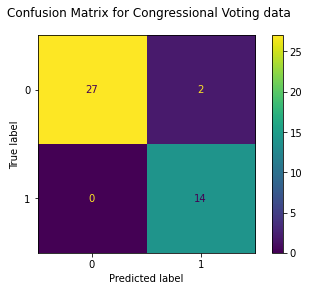

In [225]:
fig=plot_confusion_matrix(mlpc, X_test, y_test)
fig.figure_.suptitle("Confusion Matrix for Congressional Voting data")
fig.figure_.savefig('../../plots/Congressional_voting/MLP_holdout_confusion')
plt.show()

In [226]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))
print("\nAccuracy: ", round(accuracy_score(y_test, pred_mlpc),5))
print("Precision:", round(metrics.precision_score(y_test, pred_mlpc),5)) #what percentage of positive tuples are labeled as such?
print("Recall:", round(metrics.recall_score(y_test, pred_mlpc),5)) #what percentage of positive tuples are labelled as such?
print("F1-score:", round(metrics.f1_score(y_test, pred_mlpc, average='weighted'),5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        14

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

[[29  0]
 [ 0 14]]

Accuracy:  1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


### K-Fold Cross-Validation

In [227]:
k = 8
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(pipeline , X, y, cv = kf)
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.949


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


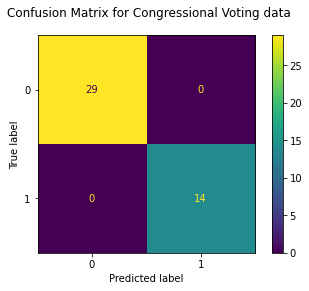

In [228]:
fig=plot_confusion_matrix(pipeline, X_test, y_test)
fig.figure_.suptitle("Confusion Matrix for Congressional Voting data")
fig.figure_.savefig('../../plots/Congressional_voting/MLP_confusion.png')
plt.show()

In [229]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))
print("\nAccuracy: ", round(accuracy_score(y_test, pred_mlpc),5))
print("Precision:", round(metrics.precision_score(y_test, pred_mlpc),5))
print("Recall:", round(metrics.recall_score(y_test, pred_mlpc),5))
print("F1-score:", round(metrics.f1_score(y_test, pred_mlpc, average='weighted'),5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        14

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

[[29  0]
 [ 0 14]]

Accuracy:  1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


# Prediction on test set (kaggle)

### Random Forest Prediction

predict on test set

In [230]:
Xrfp = pd.read_csv(f'../../outputs/Congressional_voting/congressional_voting_preprocessed_{kind}_tes.csv')
Xrfp = sc.transform(Xrfp)
yrfp = rfc.predict(Xrfp)
yrfp

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

putting predictions and ID back together

In [231]:
data = {'ID':[430,411,167,99,415,173,40,336,132,288,381,79,190,271,272,16,341,108,309,177,305,152,155,318,379,128,193,182,178,124,31,192,373,377,131,86,333,83,300,265,32,306,347,137,220,432,139,327,247,397,36,156,78,9,369,255,253,209,387,413,303,5,184,34,54,276,330,268,84,58,237,71,384,98,199,180,399,30,27,147,337,380,310,392,175,160,141,404,52,319,81,212,24,133,19,85,140,229,216,26,230,266,250,161,340,213,14,183,285,416,286,187,408,25,69,201,188,151,206,356,55,101,138,97,170,363,335,57,227,194,126,145,80,29,391,181,10,41,44,89,281,328,204,236,116,210,348,62,103,109,162,110,235,283,421,158,254,385,394,218,13,198,117,365,60,46,23,427,6,323,174,211,144,11,295,342,418,221,107,308,207,157,401,22,407,72,390,42,402,176,238,429,395,279,433,362,77,339,8,96,322,307,185,165,127,47,242,224,119,51,405,118,304,386,189,53,186],
        'class': yrfp}

rfp_df = pd.DataFrame(data)
rfp_df.head()

,ID,class
0,430,0
1,411,1
2,167,1
3,99,0
4,415,0


reformat the classes from 0 and 1 back to "democrat" and "republican"

In [232]:
reformat_rfp = rfp_df.replace(to_replace=[0,1], value=["democrat","republican"])
reformat_rfp.head()

,ID,class
0,430,democrat
1,411,republican
2,167,republican
3,99,democrat
4,415,democrat


save to output solution csv file

In [233]:
cvp_sol = f'../../outputs/Congressional_voting/congressional_voting_preprocessed_sol_rfp_{kind}.csv'
reformat_rfp.to_csv(path_or_buf=cvp_sol, sep=',', na_rep='', float_format=None, columns=None, header=True, index=False, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)

### SVM Prediction

predict on test set

In [234]:
Xsvm = pd.read_csv(f'../../outputs/Congressional_voting/congressional_voting_preprocessed_{kind}_tes.csv')
Xsvm = sc.transform(Xsvm)
ysvm = svc.predict(Xsvm)
ysvm

/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

putting predictions and ID back together

In [235]:
data = {'ID':[430,411,167,99,415,173,40,336,132,288,381,79,190,271,272,16,341,108,309,177,305,152,155,318,379,128,193,182,178,124,31,192,373,377,131,86,333,83,300,265,32,306,347,137,220,432,139,327,247,397,36,156,78,9,369,255,253,209,387,413,303,5,184,34,54,276,330,268,84,58,237,71,384,98,199,180,399,30,27,147,337,380,310,392,175,160,141,404,52,319,81,212,24,133,19,85,140,229,216,26,230,266,250,161,340,213,14,183,285,416,286,187,408,25,69,201,188,151,206,356,55,101,138,97,170,363,335,57,227,194,126,145,80,29,391,181,10,41,44,89,281,328,204,236,116,210,348,62,103,109,162,110,235,283,421,158,254,385,394,218,13,198,117,365,60,46,23,427,6,323,174,211,144,11,295,342,418,221,107,308,207,157,401,22,407,72,390,42,402,176,238,429,395,279,433,362,77,339,8,96,322,307,185,165,127,47,242,224,119,51,405,118,304,386,189,53,186],
        'class': ysvm}
svm_df = pd.DataFrame(data)
svm_df.head()

,ID,class
0,430,0
1,411,1
2,167,1
3,99,0
4,415,0


reformat the classes from 0 and 1 back to "democrat" and "republican"

In [236]:
reformat_svm = svm_df.replace(to_replace=[0,1],  value=["democrat","republican"])
reformat_svm.head()

,ID,class
0,430,democrat
1,411,republican
2,167,republican
3,99,democrat
4,415,democrat


save to output solution csv file

In [237]:
cvp_sol = f'../../outputs/Congressional_voting/congressional_voting_preprocessed_sol_svm_{kind}.csv'
reformat_svm.to_csv(path_or_buf=cvp_sol, sep=',', na_rep='', float_format=None, columns=None, header=True, index=False, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)

### MLP Classifier

predict on test set

In [238]:
Xmlpc = pd.read_csv(f'../../outputs/Congressional_voting/congressional_voting_preprocessed_{kind}_tes.csv')
Xmlpc = sc.transform(Xmlpc)
ymlpc = mlpc.predict(Xmlpc)
ymlpc

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

putting predictions and ID back together

In [239]:
data = {'ID':[430,411,167,99,415,173,40,336,132,288,381,79,190,271,272,16,341,108,309,177,305,152,155,318,379,128,193,182,178,124,31,192,373,377,131,86,333,83,300,265,32,306,347,137,220,432,139,327,247,397,36,156,78,9,369,255,253,209,387,413,303,5,184,34,54,276,330,268,84,58,237,71,384,98,199,180,399,30,27,147,337,380,310,392,175,160,141,404,52,319,81,212,24,133,19,85,140,229,216,26,230,266,250,161,340,213,14,183,285,416,286,187,408,25,69,201,188,151,206,356,55,101,138,97,170,363,335,57,227,194,126,145,80,29,391,181,10,41,44,89,281,328,204,236,116,210,348,62,103,109,162,110,235,283,421,158,254,385,394,218,13,198,117,365,60,46,23,427,6,323,174,211,144,11,295,342,418,221,107,308,207,157,401,22,407,72,390,42,402,176,238,429,395,279,433,362,77,339,8,96,322,307,185,165,127,47,242,224,119,51,405,118,304,386,189,53,186],
        'class': ymlpc}
mlpc_df = pd.DataFrame(data)
mlpc_df.head()

,ID,class
0,430,0
1,411,1
2,167,1
3,99,0
4,415,0


reformat the classes from 0 and 1 back to "democrat" and "republican"

In [240]:
reformat_mlpc = mlpc_df.replace(to_replace=[0,1], value=["democrat","republican"])
reformat_mlpc.head()

,ID,class
0,430,democrat
1,411,republican
2,167,republican
3,99,democrat
4,415,democrat


save to output solution csv file

In [241]:
cvp_sol = f'../../outputs/Congressional_voting/congressional_voting_preprocessed_sol_mlpc_{kind}.csv'
reformat_mlpc.to_csv(path_or_buf=cvp_sol, sep=',', na_rep='', float_format=None, columns=None, header=True, index=False, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)